In [48]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [49]:
# Read the data
# df = pd.read_csv('Mall_Customers.csv')
# path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

df = pd.read_csv('exams.csv')

In [50]:
# Print the first 5 rows of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [51]:
# Get the shape of the data
df.shape

(1000, 8)

In [52]:
# Check the data types of the variables
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [53]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [54]:
# Check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [55]:
# Get the most important features
df.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


<AxesSubplot: >

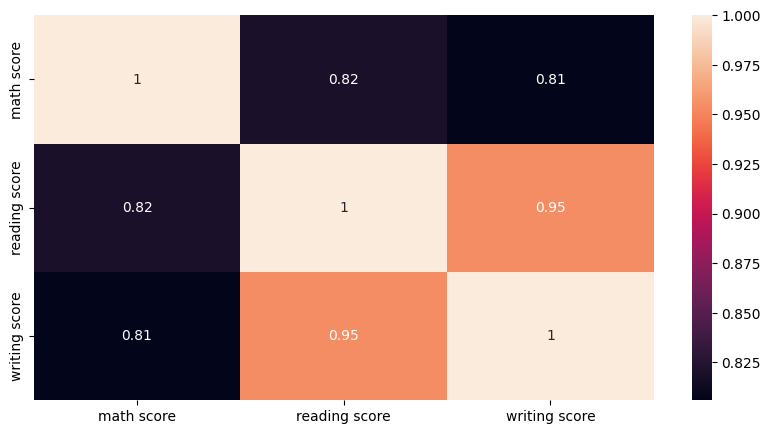

In [56]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [57]:
# Rename column
df.rename(columns={'reading score': 'reading_score', 'writing score': 'writing_score'}, inplace=True)

In [58]:
# Only get the most correlated features
df = df[['reading_score', 'writing_score']]

labels = ['reading_score', 'writing_score']

In [59]:
# Show the first 5 rows of the data
df.head()

,reading_score,writing_score
0,67,63
1,59,55
2,60,50
3,78,68
4,73,68


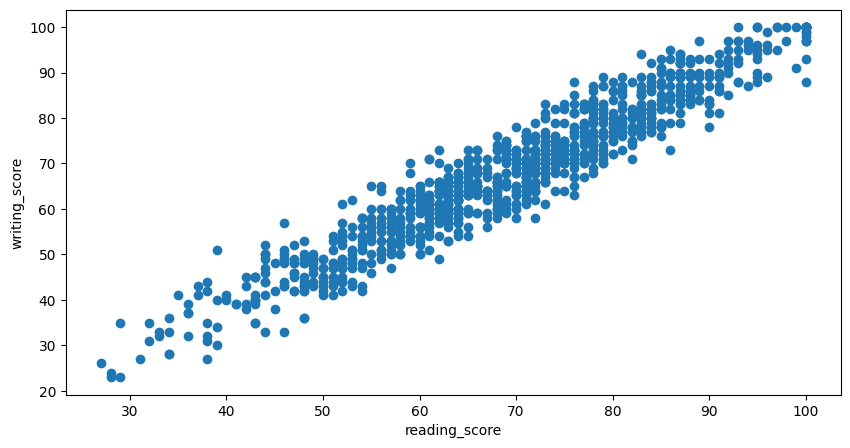

In [60]:
# Plot the data
plt.scatter(df[labels[0]], df[labels[1]])
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.show()

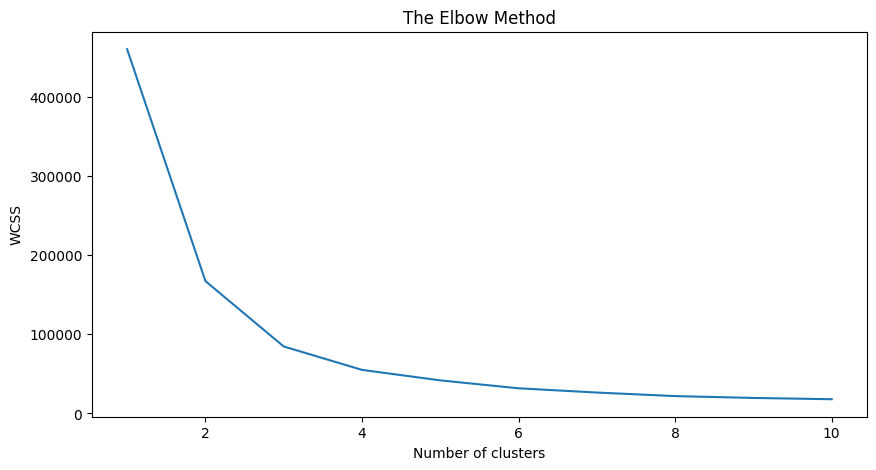

In [61]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

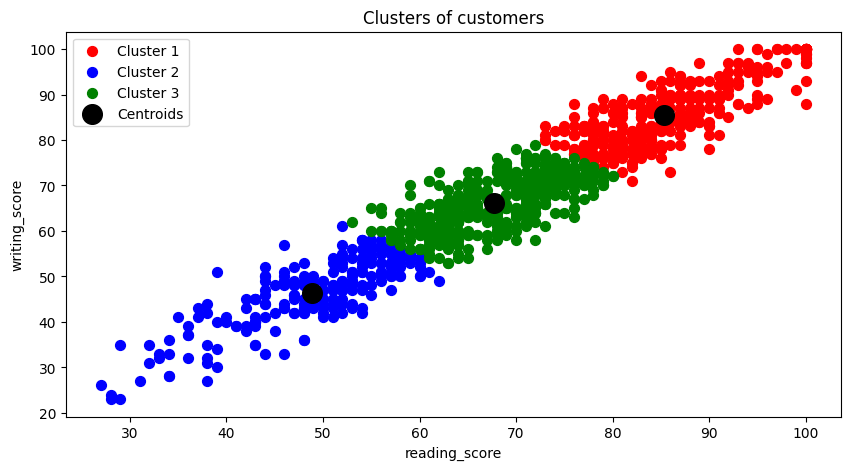

In [63]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0][labels[0]], df[y_kmeans == 0][labels[1]], s=50, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1][labels[0]], df[y_kmeans == 1][labels[1]], s=50, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2][labels[0]], df[y_kmeans == 2][labels[1]], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.legend()
plt.show()

In [64]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [65]:
# Show the first 5 rows of the data
df.head()

,reading_score,writing_score,Cluster
0,67,63,2
1,59,55,1
2,60,50,1
3,78,68,2
4,73,68,2


In [66]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [67]:
df['Cluster'].unique()

array([2, 1, 0], dtype=int32)

In [68]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))